In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns

/Users/shovitraj/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
confirmed   = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,172,176,183,186,189,197,212,212,259,267


In [4]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,548,569,581,598,618,639,675,683,703,721
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,42,43,44,44,45,47,49,51,53,55
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,825,837,845,852,861,869,878,885,892,897
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,8,9,9,10,10,10,10,10,10,11


In [5]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,7962,8292,8764,8841,9260,9869,10174,10306,10674,12604
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1114,1126,1134,1159,1195,1217,1250,1298,1346,1384
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,8196,8324,8422,8559,8674,8792,8920,9066,9202,9371
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,792,792,792,796,797,797,797,799,799,799
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,66,66,77,77,77,77,81,81,81,81


In [6]:
confirmed.shape

(266, 163)

In [7]:
deaths.shape

(266, 163)

In [8]:
recovered.shape

(253, 163)

In [9]:
#Rename to consistent values
confirmed['Country/Region'].replace('Mainland China', 'China', inplace=True)
deaths['Country/Region'].replace('Mainland China', 'China', inplace=True)
recovered['Country/Region'].replace('Mainland China', 'China', inplace=True)

In [10]:
#Handle empty data
confirmed[['Province/State']] = confirmed[['Province/State']].fillna('')
confirmed.fillna(0, inplace=True)
deaths[['Province/State']] = deaths[['Province/State']].fillna('')
deaths.fillna(0, inplace=True)
recovered[['Province/State']] = recovered[['Province/State']].fillna('')
recovered.fillna(0, inplace=True)


In [11]:
confirmed.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20
0,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,172,176,183,186,189,197,212,212,259,267


In [12]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20
0,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,548,569,581,598,618,639,675,683,703,721
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,42,43,44,44,45,47,49,51,53,55
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,825,837,845,852,861,869,878,885,892,897
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,8,9,9,10,10,10,10,10,10,11


In [13]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20
0,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,7962,8292,8764,8841,9260,9869,10174,10306,10674,12604
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1114,1126,1134,1159,1195,1217,1250,1298,1346,1384
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,8196,8324,8422,8559,8674,8792,8920,9066,9202,9371
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,792,792,792,796,797,797,797,799,799,799
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,66,66,77,77,77,77,81,81,81,81


In [14]:
#Start by aggregating all the cases to see a snapshot for the world.
confirmed_count = confirmed.iloc[:, 4:].sum().max()
deaths_count = deaths.iloc[:, 4:].sum().max()
recovered_count = recovered.iloc[:, 4:].sum().max()


In [15]:
print('Total confirmed, dead, and recovered numbers in the world, respectively: ', 
     confirmed_count, deaths_count, recovered_count)

Total confirmed, dead, and recovered numbers in the world, respectively:  10145791 501893 5140899


In [16]:
#For easy plotting let us store all these numbers in a dataframe. 
#Let us also calculate active cases.
#Active=Confirmed−Deaths−Recovered

world_df = pd.DataFrame({
    'confirmed': [confirmed_count],
    'deaths': [deaths_count],
    'recovered': [recovered_count],
    'active': [confirmed_count - deaths_count - recovered_count]
})

In [17]:
print(world_df)

   confirmed  deaths  recovered   active
0   10145791  501893    5140899  4502999


In [18]:
#Unpivot the DataFrame from wide to long format
world_long_df = world_df.melt(value_vars=['confirmed','active', 'deaths', 'recovered'],
                              var_name="status",
                              value_name="count")

world_long_df['upper'] = 'confirmed'

print(world_long_df)

      status     count      upper
0  confirmed  10145791  confirmed
1     active   4502999  confirmed
2     deaths    501893  confirmed
3  recovered   5140899  confirmed


In [19]:
#fig = px.treemap(world_long_df, path=["status"], values="count",
 #                color_discrete_sequence=['#3498db', '#2ecc71', '#e74c3c'],
  #               template='plotly_dark')

#fig.show()

In [20]:
#Evolution of virus cases over time

#Remove first 4 columns about state, country, etc. and sum numbers for all dates
worldwide_confirmed = confirmed.iloc[:, 4:].sum(axis=0)
worldwide_deaths = deaths.iloc[:, 4:].sum(axis=0)
worldwide_recovered = recovered.iloc[:, 4:].sum(axis=0)
worldwide_active = worldwide_confirmed - worldwide_deaths - worldwide_recovered


In [21]:
print(worldwide_confirmed.head())



1/22/20     555
1/23/20     654
1/24/20     941
1/25/20    1434
1/26/20    2118
dtype: int64


In [22]:
print(worldwide_deaths.head())

1/22/20    17
1/23/20    18
1/24/20    26
1/25/20    42
1/26/20    56
dtype: int64


In [23]:
print(worldwide_recovered.head())

1/22/20    28
1/23/20    30
1/24/20    36
1/25/20    39
1/26/20    52
dtype: int64


In [24]:
print(worldwide_active.head())

1/22/20     510
1/23/20     606
1/24/20     879
1/25/20    1353
1/26/20    2010
dtype: int64


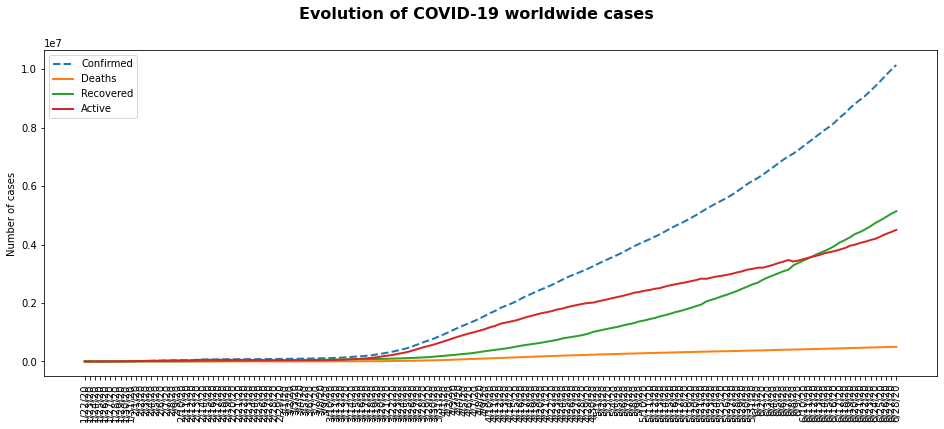

In [25]:
#Use Seaborn for plotting
fig, ax = plt.subplots(figsize=(16, 6))

sns.lineplot(x=worldwide_confirmed.index, y=worldwide_confirmed, sort=False, linewidth=2)
sns.lineplot(x=worldwide_deaths.index, y=worldwide_deaths, sort=False, linewidth=2)
sns.lineplot(x=worldwide_recovered.index, y=worldwide_recovered, sort=False, linewidth=2)
sns.lineplot(x=worldwide_active.index, y=worldwide_active, sort=False, linewidth=2)

ax.lines[0].set_linestyle("--")  #Plot Confirmed cases in dashed lines

plt.suptitle("Evolution of COVID-19 worldwide cases", fontsize=16, fontweight='bold', color='black')

plt.xticks(rotation=90)
plt.ylabel('Number of cases')

ax.legend(['Confirmed', 'Deaths', 'Recovered', 'Active'])

plt.show()

In [26]:
#Evolution of Mortality rate 
#Create a new data frame to capture all the numbers for confirmed, recovered, active, death.
world_rate_df = pd.DataFrame({
    'confirmed': worldwide_confirmed,
    'deaths': worldwide_deaths,
    'recovered': worldwide_recovered,
    'active': worldwide_active
}, index=worldwide_confirmed.index)

print(world_rate_df.tail())

         confirmed  deaths  recovered   active
6/24/20    9432072  482758    4746118  4203196
6/25/20    9610551  489312    4838921  4282318
6/26/20    9802294  494181    4945557  4362556
6/27/20    9980257  498710    5051864  4429683
6/28/20   10145791  501893    5140899  4502999


In [ ]:
#Calculate recovery and mortality rate as a fraction of confirmed
world_rate_df['recovery rate'] = world_rate_df['recovered'] / world_rate_df['confirmed'] * 100
world_rate_df['mortality rate'] = world_rate_df['deaths'] / world_rate_df['confirmed'] * 100
world_rate_df['date'] = world_rate_df.index

print(world_rate_df.tail())


In [ ]:
#Unpivot the DataFrame from wide to long format
world_rate_long_df = world_rate_df.melt(id_vars="date",
                                        value_vars=['recovery rate', 'mortality rate'],
                                        var_name="status",
                                        value_name="ratio")

print(world_rate_long_df)

In [ ]:
#USe plotly to plot the numbers
fig = px.line(world_rate_long_df, x="date", y="ratio", color='status', log_y=True, 
              title='Recovery and Mortality rate over the time',
              color_discrete_sequence=['#2ecc71', '#e74c3c'],
              template='plotly_dark')

fig.show()

In [ ]:
#################################################################################
#Plotting data onto a map using latitude and longitude values
#Takes a bit of time based on the number of countries. 
#Group rows that contain same Country/Region values. 
#We will use sum to add all values while grouping.
confirmed_agg = confirmed.groupby('Country/Region').sum().reset_index()

In [ ]:
#Data for some countries is broken down into states/provinces. 
#So we need to calculate mean latitude and longitude
confirmed_agg.loc[:, ['Lat', 'Long']] = confirmed.groupby('Country/Region').mean().reset_index().loc[:, ['Lat', 'Long']]
print(confirmed_agg)

In [ ]:
#Since there are a lot of countries, for easy visualization let us only look at countries with high numbers
MIN_CASES = 1000
confirmed_agg = confirmed_agg[confirmed_agg.iloc[:, 3:].max(axis=1) > MIN_CASES]
print(confirmed_agg.shape)
print(confirmed_agg.head())

In [ ]:
#Unpivot the DataFrame from wide to long format
confirmed_agg_long = pd.melt(confirmed_agg,
                                   id_vars=confirmed_agg.iloc[:, :3],
                                   var_name='date',
                                   value_vars=confirmed_agg.iloc[:, 3:],
                                   value_name='date_confirmed_cases')
print(confirmed_agg_long.shape)



In [ ]:
#Plotly for visualization.
fig = px.scatter_geo(confirmed_agg_long,
                     lat="Lat", lon="Long", color="Country/Region",
                     hover_name="Country/Region", size="date_confirmed_cases",
                     size_max=50, animation_frame="date",
                     template='plotly_dark', projection="natural earth",
                     title="COVID-19 worldwide confirmed cases over time")

fig.show()
